In [2]:
import numpy as np
import matplotlib.pyplot as plt

Create image grid with image size $100 \times 80$ pixels (rows by columns)

In [3]:
M = 100 # number of rows
N = 80  # number of columns 

x = np.arange(0,N)  # horizontal grid 
y = np.arange(0,M)  # vertical grid 
xx, yy = np.meshgrid(x, y)

Let's see what meshgrid does

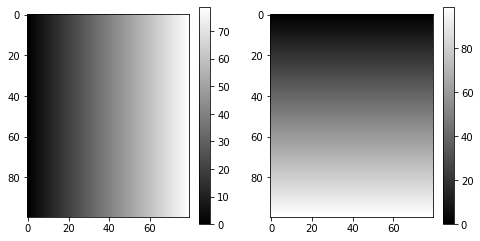

In [4]:
fig = plt.figure(figsize =(8,4))
plt.subplot(1, 2, 1)
plt.imshow(xx, cmap='gray', aspect='equal')  # imshow is how we plot images, cmap is colormap
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(yy, cmap='gray', aspect='equal')
plt.colorbar()
plt.show()

Each grid point in our image is defined by the spatial vector $\bar{x}=(x,y)=(n,m)$

Now we create a sinusoid signal with frequency $\bar{u}=\left(\frac{v_0}{N},\frac{u_0}{M}\right) $:
$$ z[m,n] = \sin(2\pi \bar{x}\cdot \bar{u})=\sin(2\pi \left(\frac{mu_0}{M}+\frac{nv_0}{N} \right))$$

In [4]:
v0 = 4/N
u0 = 0
z = np.sin(2*np.pi*(xx*v0 + yy*u0)) 

Now we can apply 2D-FFT to see what our sinusoidal basis functions looks like in the frequency domain
$$\hat{z}[u,v]=\frac{1}{\sqrt{MN}}\sum_{m=0}^{M-1}\sum_{n=0}^{N-1}z[m,n] e^{-2\pi i \left(\frac{u_0m}{M}+\frac{v_0n}{N}\right)}$$

In [5]:
z_hat = np.fft.fft2(z) # calculate the 2D DFT in numpy

Plot image $z[m,n]$ and its DFT magnitude $\vert F[u,v]\vert$

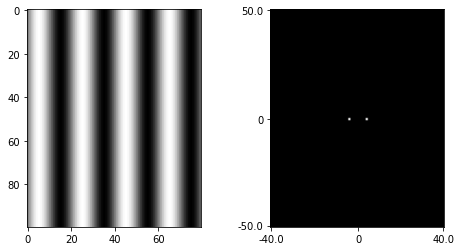

In [6]:
fig = plt.figure(figsize =(8,4))
plt.subplot(1, 2, 1)
plt.imshow(z,cmap='gray', aspect='equal')
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(abs(z_hat)),cmap='gray', aspect='equal')  # don't forget to fftshift
#  For two-dimensional input, swaps first and third quadrants, and second and fourth quadrants.
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[M/2,0,-M/2]) 
plt.show()

What is this signal?
This image is a sinsuoid in the horizontal axis and constant in the vertical axis (does not depend on m)
$$ z[m,n] =\sin\left(2\pi \left(\frac{m0}{M}+\frac{nv}{N} \right)\right) = \sin\left(2\pi \left(\frac{nv}{N} \right)\right)$$
Therefore the 2D Fourier transform has the form $$\hat{z}[u,v]= \frac{\sqrt{MN}}{2}\left({\delta(v-v_0)} + \delta(v+v_0)\right)$$

Indeed we can "slice" a 1D signal by extracting the first row and applying the FFT to that row, and we compare that to plotting $\hat{z}[0,v]$

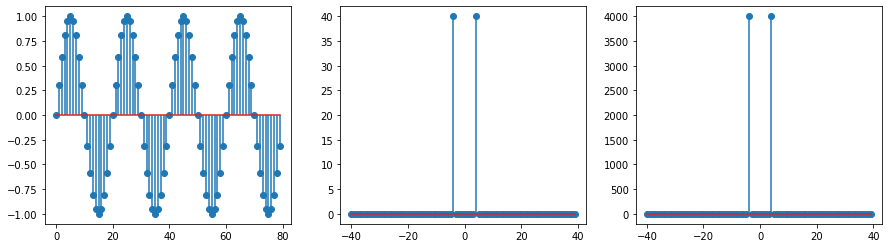

In [ ]:
fig = plt.figure(figsize =(15,4))
plt.subplot(1, 3, 1)
plt.stem(np.arange(0,N),z[0,:],use_line_collection=True)
plt.subplot(1, 3, 2)
plt.stem(np.arange(-N/2,N/2),np.abs(np.fft.fftshift(np.fft.fft(z[0,:]))),use_line_collection=True)
plt.subplot(1, 3, 3)
plt.stem(np.arange(-N/2,N/2),np.abs(np.fft.fftshift(z_hat[0,:])),use_line_collection=True)
plt.show()

Note the difference in the amplitude is due to the difference in the way DFT and DFT2D normlizations are defined in Python (2D DFT is scaled by $MN$). Note thatb this definition does not match definition in class. No need to panic. Both conventions are correct. Just need to be aware of this.

Let's test what happens if we have $u_0,v_0\neq0$

In [7]:
v0 = 4/N  # note in figure below there are 4 cycles in horizontal axis
u0 = 2/M  # note in figure below there are 2 cycles in vertical axis
z = np.sin(2*np.pi*(xx*v0 + yy*u0)) 

z_hat = np.fft.fft2(z)

We still have 2 deltas, but now they are in direction $\hat{u}=(4,2)$

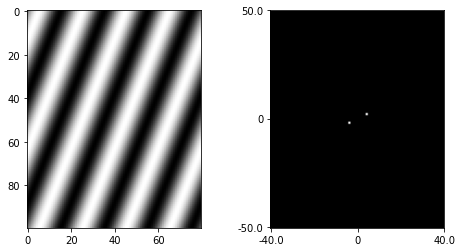

In [8]:
fig = plt.figure(figsize =(8,4))
plt.subplot(1, 2, 1)
plt.imshow(z,cmap='gray', aspect='equal')
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(abs(z_hat)),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
plt.xticks(ticks=[0,N/2, N], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M], labels=[-M/2,0,M/2]) 
plt.show()

We keep $v_0$ constant but increase $u_0$

In [9]:
v0 = 4/N
u0 = 10/M
z = np.sin(2*np.pi*(xx*v0 + yy*u0)) 

z_hat = np.fft.fft2(z)

Note the deltas have pulled away in the vertical axis

Therefore the 2D Fourier transform has the form $$\hat{z}[u,v]= \frac{\sqrt{MN}}{2}\left({\delta[u-u_0,v-v_0]} + \delta[u+u_0,v+v_0]\right)$$

and we obtain two deltas at $[u,v]=[10,4]$ and $[u,v]=[-10,-4]$ (remember these coordinates are [row,column])

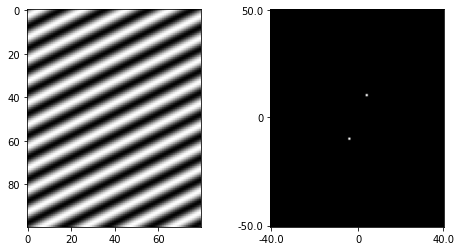

In [10]:
fig = plt.figure(figsize =(8,4))
plt.subplot(1, 2, 1)
plt.imshow(z,cmap='gray', aspect='equal')
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(abs(z_hat)),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
plt.show()

As we increase the frequency more, the deltas move to higher and higher frequencies in DFT plot

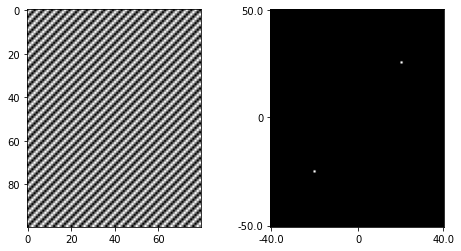

In [12]:
v0 = 20/N
u0 = 25/M
z = np.sin(2*np.pi*(xx*v0 + yy*u0)) 

z_hat = np.fft.fft2(z)

fig = plt.figure(figsize =(8,4))
plt.subplot(1, 2, 1)
plt.imshow(z,cmap='gray', aspect='equal')
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(abs(z_hat)),cmap='gray', aspect='equal',origin='lower')  # don't forget to fftshift
plt.xticks(ticks=[0,N/2, N-1], labels=[-N/2,0,N/2]) 
plt.yticks(ticks=[0,M/2, M-1], labels=[-M/2,0,M/2]) 
plt.show()